### Assignment 3 Python
Topic : Balance Sheet analysing for Non-Banking/Financial sector sectors

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

***To Ignore Warnings***

In [100]:
import warnings
warnings.catch_warnings()
warnings.simplefilter("ignore")

In [101]:
data = pd.read_csv("./Dataset/balance_sheets/full_non_banking.csv").drop("Id",axis=1)

In [102]:
data.head()

,Name,Catagory,Symbol,LinkQuate,BS_standalone_link,EQUITY SHARE CAPITAL,TOTAL SHARE CAPITAL,RESERVES AND SURPLUS,TOTAL RESERVES AND SURPLUS,TOTAL SHAREHOLDERS FUNDS,...,CAPITAL GOODS,EXPENDITURE IN FOREIGN CURRENCY,DIVIDEND REMITTANCE IN FOREIGN CURRENCY,FOB VALUE OF GOODS,OTHER EARNINGS,BONUS EQUITY SHARE CAPITAL,NON-CURRENT INVESTMENTS QUOTED MARKET VALUE,NON-CURRENT INVESTMENTS UNQUOTED BOOK VALUE,CURRENT INVESTMENTS QUOTED MARKET VALUE,CURRENT INVESTMENTS UNQUOTED BOOK VALUE
0,Carborundum,abrasives,CARBORUNDUM,CU,http://www.moneycontrol.com/financials/carboru...,18.94,18.94,1341.26,1341.26,1367.08,...,19.91,6.81,0.0,391.17,8.31,16.57,0.0,1.15,0.00,61.60
1,Grindwell Norto,abrasives,GRINDWELLNORTO,GN,http://www.moneycontrol.com/financials/grindwe...,55.36,55.36,1121.31,1121.31,1176.67,...,0.00,376.73,0.0,0.00,332.10,51.14,0.8,188.40,0.00,413.89
2,Orient Abrasive,abrasives,ORIENTABRASIVE,OA01,http://www.moneycontrol.com/financials/orienta...,11.97,11.97,220.55,220.55,232.52,...,0.00,11.29,0.0,71.18,0.00,10.47,0.0,0.00,0.00,0.00
3,Wendt,abrasives,WENDT,WI05,http://www.moneycontrol.com/financials/wendt(i...,2.00,2.00,117.66,117.66,119.66,...,1.63,1.37,0.0,39.77,3.48,1.50,0.0,4.31,30.93,0.00
4,Century Extr,aluminium,CENTURYEXTR,CE02,http://www.moneycontrol.com/financials/century...,8.00,8.00,42.46,42.46,50.46,...,0.00,2.80,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00


In [103]:
data.tail()

,Name,Catagory,Symbol,LinkQuate,BS_standalone_link,EQUITY SHARE CAPITAL,TOTAL SHARE CAPITAL,RESERVES AND SURPLUS,TOTAL RESERVES AND SURPLUS,TOTAL SHAREHOLDERS FUNDS,...,CAPITAL GOODS,EXPENDITURE IN FOREIGN CURRENCY,DIVIDEND REMITTANCE IN FOREIGN CURRENCY,FOB VALUE OF GOODS,OTHER EARNINGS,BONUS EQUITY SHARE CAPITAL,NON-CURRENT INVESTMENTS QUOTED MARKET VALUE,NON-CURRENT INVESTMENTS UNQUOTED BOOK VALUE,CURRENT INVESTMENTS QUOTED MARKET VALUE,CURRENT INVESTMENTS UNQUOTED BOOK VALUE
1447,Uniinfo Telecom,telecommunicationsservice,UNIINFOTELECOM,UTS,http://www.moneycontrol.com/financials/uniinfo...,10.69,10.69,26.82,26.82,37.52,...,0.00,0.32,0.0,0.00,0.0,6.61,0.00,0.11,0.0,0.00
1448,Vodafone Idea,telecommunicationsservice,VODAFONEIDEA,IC8,http://www.moneycontrol.com/financials/vodafon...,28735.40,28735.40,-19799.70,-19799.70,9001.30,...,0.00,6817.90,0.0,0.00,1765.2,0.00,0.00,0.00,0.0,0.00
1449,Mohota Ind,textilescompositemills,MOHOTAIND,RRM,http://www.moneycontrol.com/financials/mohotai...,14.71,14.71,1.86,159.65,174.36,...,0.00,0.00,0.0,0.00,0.0,0.00,0.00,15.54,0.0,0.00
1450,Nahar Ent,textilescompositemills,NAHARENT,NIE,http://www.moneycontrol.com/financials/naharin...,40.03,146.23,606.41,606.41,752.64,...,0.00,61.02,0.0,209.55,0.0,1.60,0.01,80.23,0.0,0.00
1451,Ruby Mills,textilescompositemills,RUBYMILLS,RM04,http://www.moneycontrol.com/financials/rubymil...,8.36,8.36,464.74,464.74,473.10,...,0.53,0.53,0.0,0.70,0.0,3.33,0.00,0.00,0.0,12.02


In [104]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'catagory', 'symbol', 'linkquate', 'bs_standalone_link',
       'equity share capital', 'total share capital', 'reserves and surplus',
       'total reserves and surplus', 'total shareholders funds',
       'long term borrowings', 'deferred tax liabilities [net]',
       'other long term liabilities', 'long term provisions',
       'total non-current liabilities', 'short term borrowings',
       'trade payables', 'other current liabilities', 'short term provisions',
       'total current liabilities', 'total capital and liabilities',
       'tangible assets', 'intangible assets', 'capital work-in-progress',
       'other assets', 'fixed assets', 'non-current investments',
       'deferred tax assets [net]', 'long term loans and advances',
       'other non-current assets', 'total non-current assets',
       'current investments', 'inventories', 'trade receivables',
       'cash and cash equivalents', 'short term loans and advances',
       'othercurrentassets', 'total cu

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 53 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   name                                         1452 non-null   object 
 1   catagory                                     1452 non-null   object 
 2   symbol                                       1452 non-null   object 
 3   linkquate                                    1452 non-null   object 
 4   bs_standalone_link                           1452 non-null   object 
 5   equity share capital                         1368 non-null   float64
 6   total share capital                          1368 non-null   float64
 7   reserves and surplus                         1368 non-null   float64
 8   total reserves and surplus                   1368 non-null   float64
 9   total shareholders funds                     1368 non-null   float64
 10  

## Statistical Analysis

In [106]:
## statical information
## some of the columns looked different so though of looking at each of them 
## some columns all zero values in first 3 quatile therefor decided to look at distributions in detail so instead of using the default quatiles
## defined our own percentiles of 10,20,30,50,80,90

## first 10 columns
data[data.columns[:11]].describe(percentiles=[.1,.2,.3,.5,.6,.8,.9])



,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,long term borrowings
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,158.079839,161.643713,2493.946981,2498.526572,2664.322032,1514.826696
std,970.381401,974.250421,14520.433694,14519.679349,14813.873810,12885.826751
min,1.000000,1.000000,-34329.000000,-34329.000000,-32946.000000,0.000000
10%,8.200000,8.241000,1.909000,4.246000,20.671000,0.000000
20%,11.418000,11.506000,46.220000,48.088000,70.774000,0.000000
30%,14.461000,14.712000,109.653000,110.721000,141.622000,0.000000
50%,25.000000,25.345000,371.425000,375.025000,419.935000,11.725000
60%,33.626000,34.730000,616.092000,620.860000,675.564000,32.550000
80%,91.964000,94.530000,1717.938000,1717.938000,1834.134000,221.920000


### Observations
- columns `'equity share capital'` and `'total share capital'`, and `'reserves and surplus'` and `'total reserves and surplus'` looks alot similar, moving ahead in the EDA we can visualise and see if they are very highly correlated and move ahead with taking one from the pair.
- One Interesting observation here is, the `minimum` values for some of the columns are `negative`.

In [107]:
data[data.columns[21:31]].describe(percentiles=[.1,.2,.3,.5,.6,.75,.8,.9])

,tangible assets,intangible assets,capital work-in-progress,other assets,fixed assets,non-current investments,deferred tax assets [net],long term loans and advances,other non-current assets,total non-current assets
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,1577.376352,232.007792,169.827639,15.890921,2026.180885,1366.836813,68.824437,131.003304,222.613465,3815.458713
std,10792.204928,3837.573343,1400.464731,107.621396,13833.363094,13727.889745,666.628245,1447.701960,1325.783534,27026.306462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000
10%,5.151000,0.000000,0.000000,0.000000,8.183000,0.000000,0.000000,0.000000,0.107000,31.104000
20%,22.242000,0.000000,0.000000,0.000000,31.534000,0.000000,0.000000,0.000000,1.970000,79.072000
30%,52.018000,0.000000,0.000000,0.000000,67.528000,0.481000,0.000000,0.000000,5.211000,149.584000
50%,161.150000,0.485000,1.745000,0.000000,206.590000,22.330000,0.000000,0.350000,17.490000,402.380000
60%,275.578000,1.530000,5.502000,0.000000,333.786000,53.338000,0.150000,1.984000,30.402000,623.586000
75%,573.580000,7.060000,23.612500,0.000000,693.147500,207.450000,8.550000,9.200000,80.455000,1302.085000


### Observation
- column `other assets` have 75% zero values.
- Similarly, columns `deferred tax assets[net]` has 50% zero values.
 

In [108]:
data[data.columns[31:41]].describe(percentiles=[.1,.2,.3,.5,.6,.8,.9])

,current investments,inventories,trade receivables,cash and cash equivalents,short term loans and advances,othercurrentassets,total current assets,total assets,contingent liabilities,raw materials
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,492.905980,487.506959,403.120453,287.006879,1673.890811,466.102405,3810.533194,7625.991966,1349.384810,56.004664
std,3617.083681,2515.208830,1501.464317,1172.962146,18997.901412,2553.160409,22782.879231,39536.539760,11614.248936,676.062243
min,0.000000,0.000000,0.000000,0.010000,-11.010000,-1.300000,0.150000,0.350000,0.000000,0.000000
10%,0.000000,0.000000,1.835000,0.770000,0.000000,1.354000,43.605000,107.539000,0.000000,0.000000
20%,0.000000,0.950000,11.928000,2.444000,0.000000,5.690000,91.152000,231.360000,0.160000,0.000000
30%,0.000000,10.957000,24.595000,4.752000,0.010000,13.693000,154.727000,379.860000,4.840000,0.000000
50%,0.000000,58.985000,77.065000,17.035000,0.880000,41.270000,404.525000,926.115000,43.905000,0.000000
60%,0.000000,102.600000,124.430000,31.812000,3.102000,66.112000,632.482000,1483.680000,84.250000,0.000000
80%,62.200000,334.088000,342.488000,132.810000,29.488000,227.936000,1915.800000,4274.848000,410.136000,0.000000


### Observation 
- column `current investments` has 60% of the values as zeroes.
- column `raw materials` has 80% of the values as zeroes.

In [109]:
data[data.columns[41:]].describe(percentiles=[.1,.2,.3,.6,.8,.9])

,"stores, spares and loose tools",trade/other goods,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
count,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1.368000e+03,1368.000000
mean,35.351411,35.351411,4.803114,1010.977807,0.339474,171.031411,625.268136,47.574883,186.378808,632.340797,2.603509e+03,201.623977
std,616.436289,616.436289,57.216391,11148.765711,6.812689,2232.299583,8668.927627,365.190787,1927.300115,10736.336583,9.220732e+04,1513.763951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
20%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
30%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
50%,0.000000,0.000000,0.000000,3.145000,0.000000,0.000000,0.000000,0.975000,0.000000,1.500000,0.000000e+00,0.000000
60%,0.000000,0.000000,0.000000,12.744000,0.000000,0.000000,0.000000,4.032000,0.000000,13.214000,0.000000e+00,0.000000
80%,0.000000,0.000000,0.000000,129.898000,0.000000,4.798000,66.572000,15.574000,0.020000,137.722000,0.000000e+00,2.296000


### Observation
- columns `stores, spares and loose tools`, `trade/other goods`, `capital goods`, `dividend remittance in foreign currency` has 90% of the values as zeroes.
- column `fob value of goods`, `other earnings`, `non-current investments quoted market value`, `current investments unquoted book value` has 60% values as zeroes.
- column `current investments quoted market value` has 80% values as zeroes.

In [110]:
## defining categorical and numerical columns

num_col_selector = make_column_selector(dtype_include='float64')
numerical_columns = num_col_selector(data)

### not including columns such as 'name', 'symbol', 'linkquate', 'bs_standalone_link' as these are merely used to indentify the records and does not contribute any thing to our analysis.
categorical_columns = ['catagory']

print(f"No. of Numerical columns:{len(numerical_columns)}")
print(f"No. of Categorical columns:{len(categorical_columns)}")


No. of Numerical columns:48
No. of Categorical columns:1


### Data Exploration

Percentage of missing values:
name                                           0.000000
catagory                                       0.000000
symbol                                         0.000000
linkquate                                      0.000000
bs_standalone_link                             0.000000
equity share capital                           0.057851
total share capital                            0.057851
reserves and surplus                           0.057851
total reserves and surplus                     0.057851
total shareholders funds                       0.057851
long term borrowings                           0.057851
deferred tax liabilities [net]                 0.057851
other long term liabilities                    0.057851
long term provisions                           0.057851
total non-current liabilities                  0.057851
short term borrowings                          0.057851
trade payables                                 0.057851
other current liab

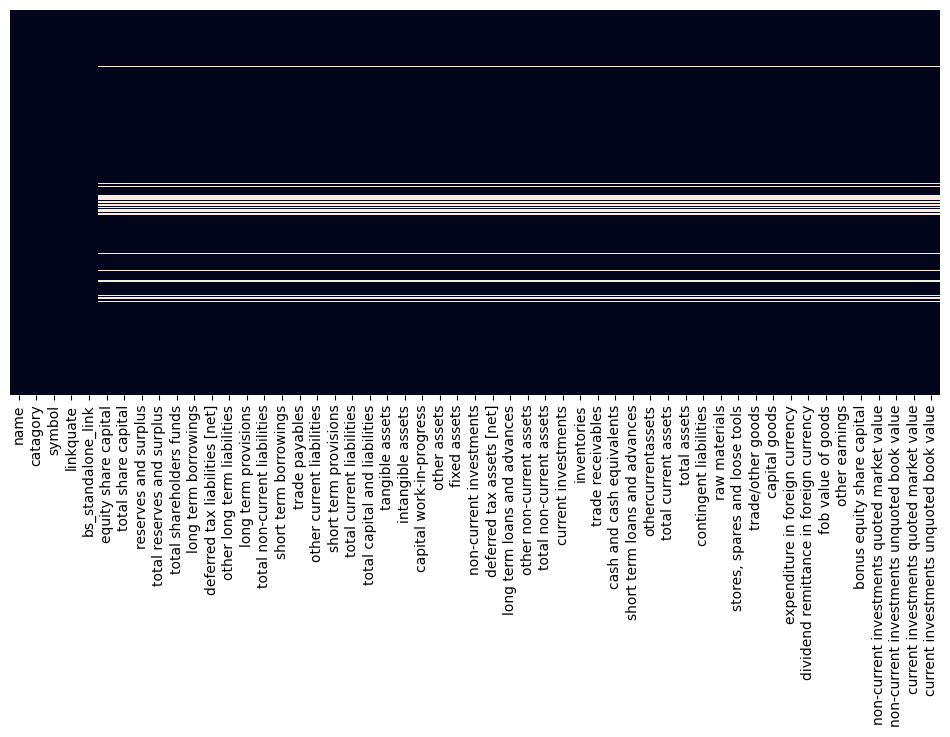

In [111]:
## Check null values
data.isnull().mean()
plt.figure(figsize=(12,5))
print(f"Percentage of missing values:\n{data.isnull().mean()}")
sns.heatmap(data.isnull(),fmt=".2f",yticklabels=False,cbar=False)
plt.show()

## Observation:
- the missing values for all columns are ~5.8% and the heat map shoes the missing values are consistent through the records, hence we can afford to completely ignore the missing values or go ahead and  impute them with a fixed value.

In [112]:
# drop missing values
print(f"Shape of original data: {data.shape}")
data.dropna(inplace=True)
print(f"Shape of data after deleting missing values: {data.shape}")

Shape of original data: (1452, 53)
Shape of data after deleting missing values: (1368, 53)


In [113]:
data.head()

,name,catagory,symbol,linkquate,bs_standalone_link,equity share capital,total share capital,reserves and surplus,total reserves and surplus,total shareholders funds,...,capital goods,expenditure in foreign currency,dividend remittance in foreign currency,fob value of goods,other earnings,bonus equity share capital,non-current investments quoted market value,non-current investments unquoted book value,current investments quoted market value,current investments unquoted book value
0,Carborundum,abrasives,CARBORUNDUM,CU,http://www.moneycontrol.com/financials/carboru...,18.94,18.94,1341.26,1341.26,1367.08,...,19.91,6.81,0.0,391.17,8.31,16.57,0.0,1.15,0.00,61.60
1,Grindwell Norto,abrasives,GRINDWELLNORTO,GN,http://www.moneycontrol.com/financials/grindwe...,55.36,55.36,1121.31,1121.31,1176.67,...,0.00,376.73,0.0,0.00,332.10,51.14,0.8,188.40,0.00,413.89
2,Orient Abrasive,abrasives,ORIENTABRASIVE,OA01,http://www.moneycontrol.com/financials/orienta...,11.97,11.97,220.55,220.55,232.52,...,0.00,11.29,0.0,71.18,0.00,10.47,0.0,0.00,0.00,0.00
3,Wendt,abrasives,WENDT,WI05,http://www.moneycontrol.com/financials/wendt(i...,2.00,2.00,117.66,117.66,119.66,...,1.63,1.37,0.0,39.77,3.48,1.50,0.0,4.31,30.93,0.00
4,Century Extr,aluminium,CENTURYEXTR,CE02,http://www.moneycontrol.com/financials/century...,8.00,8.00,42.46,42.46,50.46,...,0.00,2.80,0.0,0.05,0.00,0.00,0.0,0.00,0.00,0.00


### Observation
- Not including columns such as `'name'`, `'symbol'`, `'linkquate'`, `'bs_standalone_link'` as these are merely used to indentify the records and does not contribute any thing to our analysis.


## Exploratory Data Analysis(EDA)

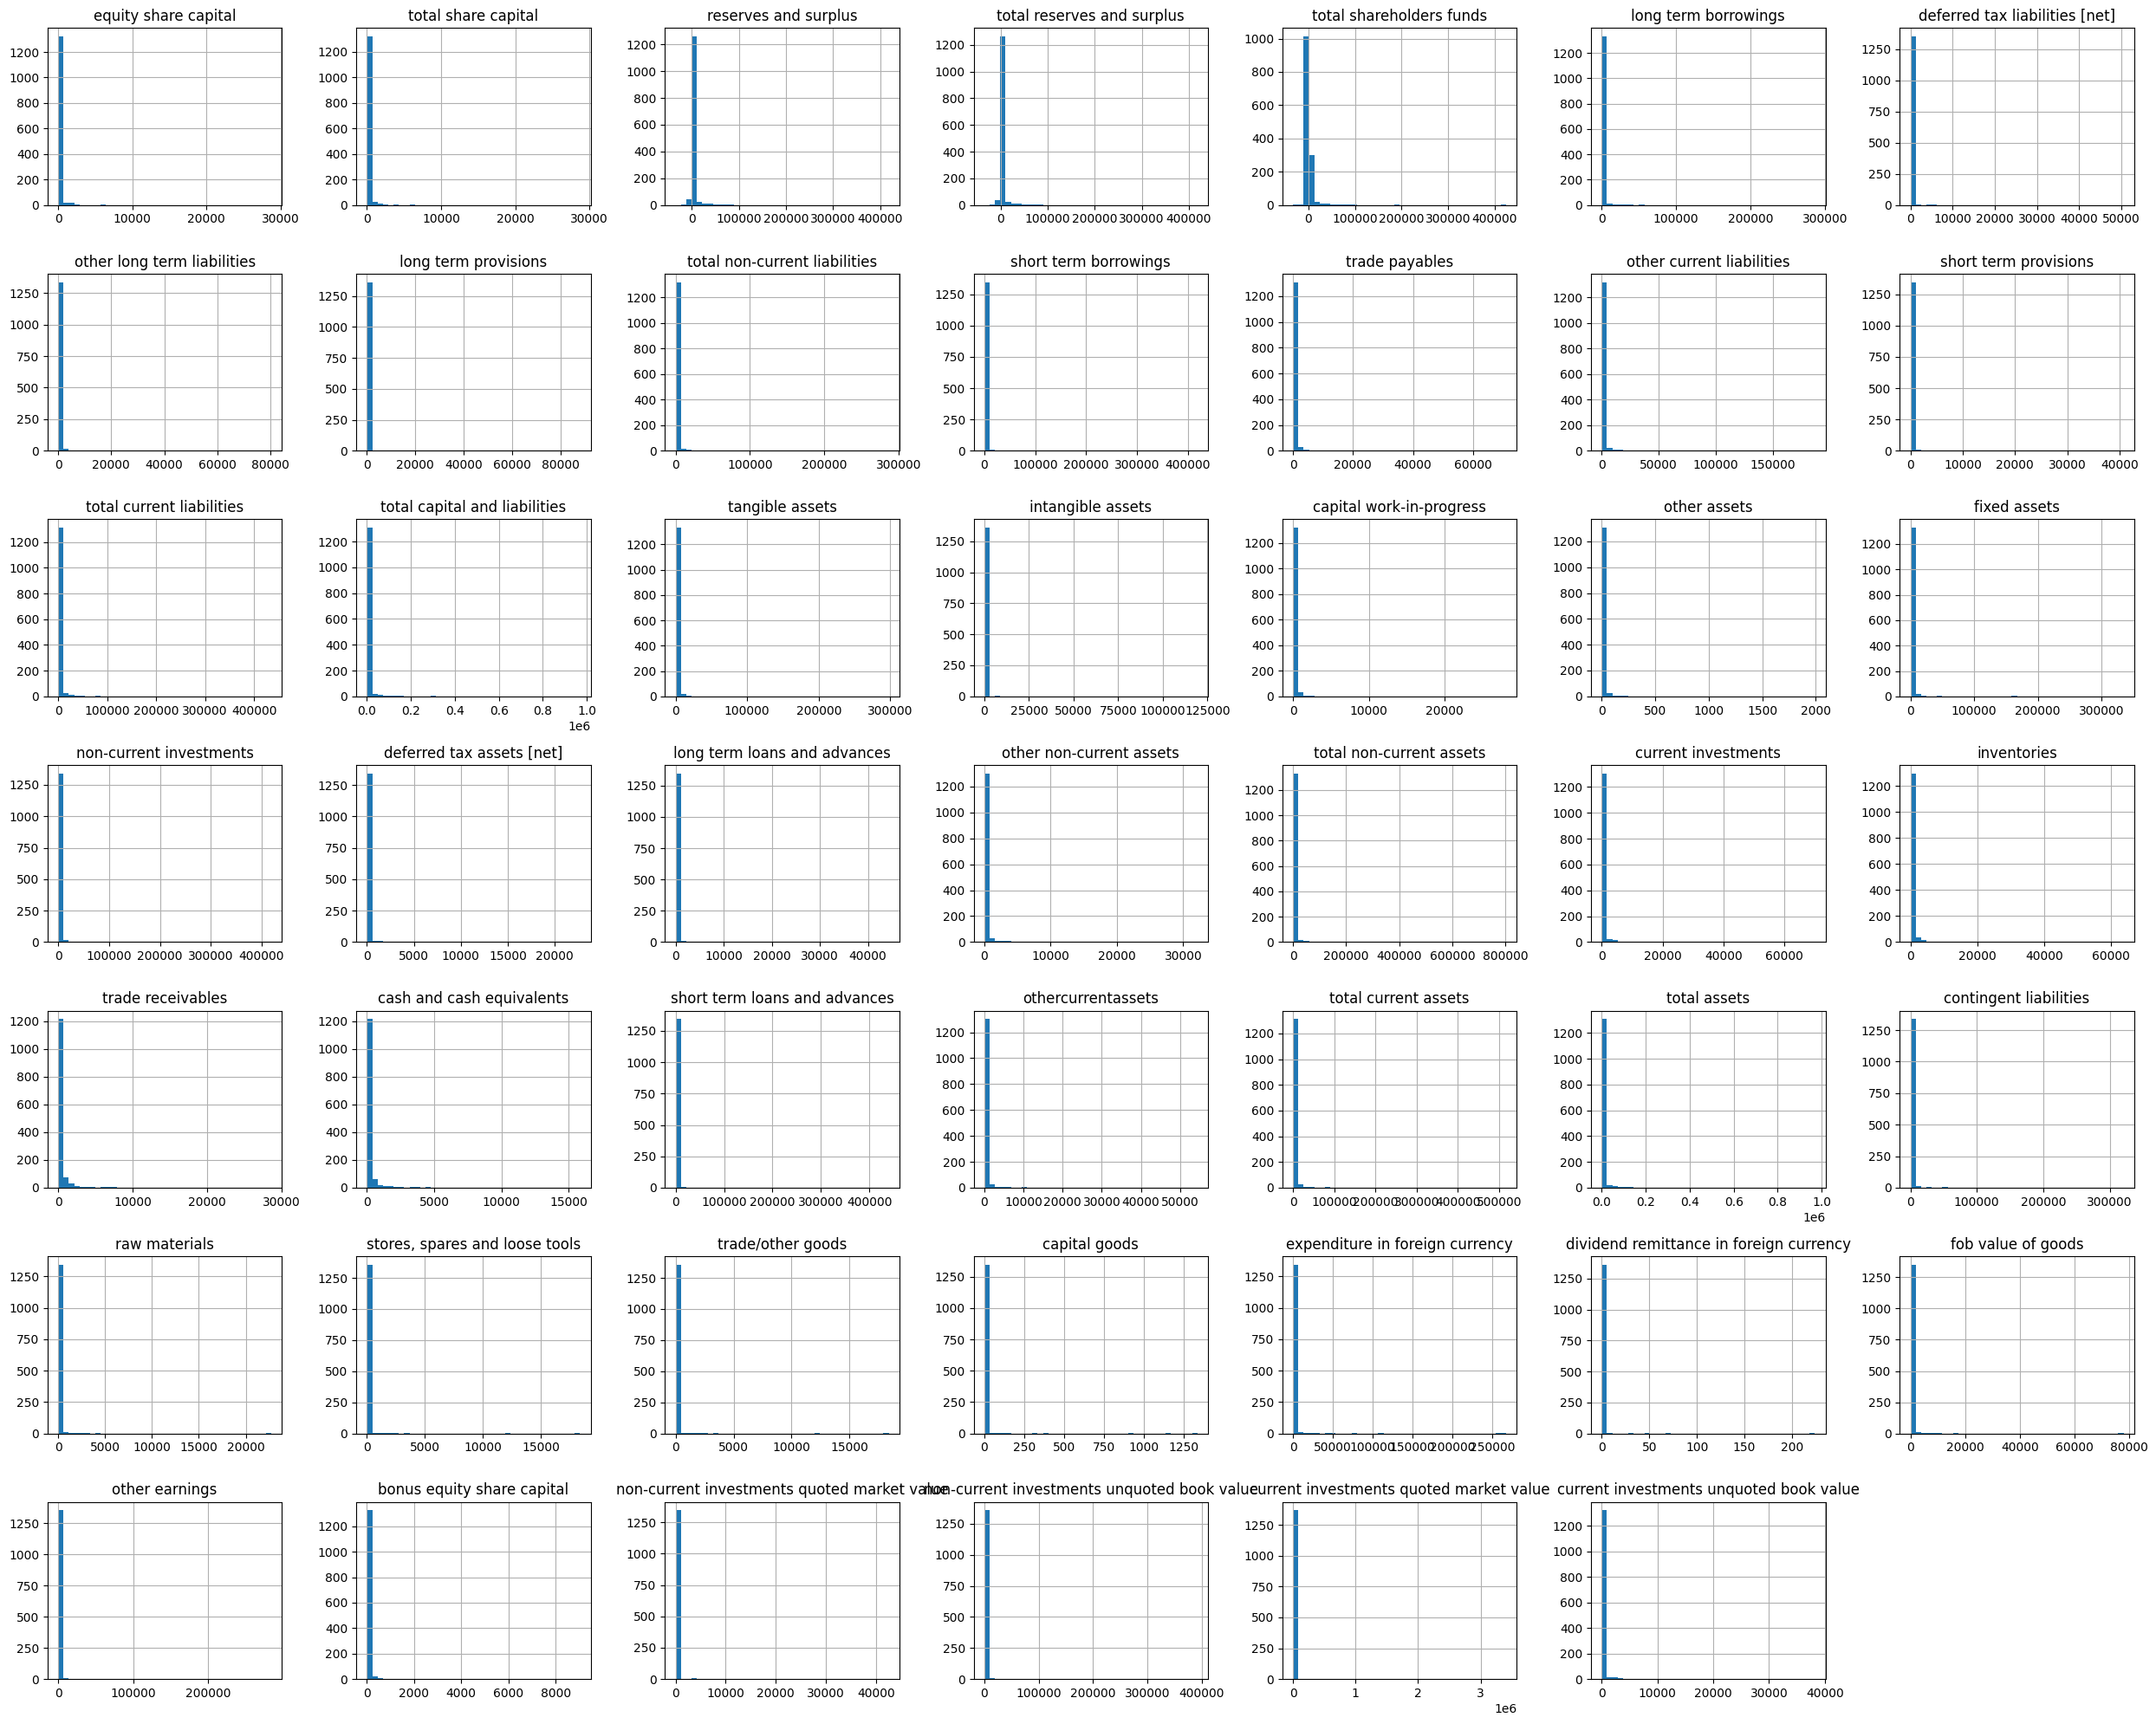

In [114]:
## visualise the data 
data.hist(bins=40,figsize=(25,20))
plt.tight_layout()
plt.show()

## Categorical Columns

In [115]:
# data['catagory'].unique()
print(f"No of Categories:{data['catagory'].nunique()}\n")
print(f"Categories:{data['catagory'].unique()}")

No of Categories:88

Categories:['abrasives' 'aluminium' 'aquaculture' 'auto23wheelers' 'autocarsjeeps'
 'autotractors' 'autoancillaries' 'bearings' 'breweriesdistilleries'
 'cablestelephone' 'castingsforgings' 'cementmajor' 'cementmini'
 'chemicals' 'cigarettes' 'compressors' 'computershardware'
 'computerssoftware' 'computerssoftwaretraining'
 'constructioncontractingcivil' 'constructioncontractinghousing'
 'constructioncontractingrealestate' 'consumergoodselectronic'
 'consumergoodswhitegoods' 'couriers' 'diversified' 'domesticappliances'
 'drycells' 'dyespigments' 'edibleoilssolventextraction'
 'electricequipment' 'electricals' 'engineering' 'engineeringheavy'
 'engines' 'textilesdenim' 'textilesgeneral' 'textilesmachinery'
 'textilesmanmade' 'textilesprocessing' 'textilesreadymadeapparels'
 'textilesspinningcottonblended' 'textilesspinningsyntheticblended'
 'textilesweaving' 'trading' 'transportlogistics' 'tyres' 'fasteners'
 'fertilisers' 'financegeneral' 'financehousing' 'financ

In [116]:
## function to set labels for plots
def plot_labels(plot, x_label=None,y_label=None,title=None):
    plt.figure(figsize=(8,6))
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    plot.set_title(title,fontdict={'fontsize':15})
    plt.tight_layout()



Top Categories with count:
miscellaneous                   126
pharmaceuticals                  80
chemicals                        57
autoancillaries                  56
mediaentertainment               42
constructioncontractingcivil     41
financeinvestments               40
diversified                      39
computerssoftware                36
financegeneral                   34
Name: catagory, dtype: int64


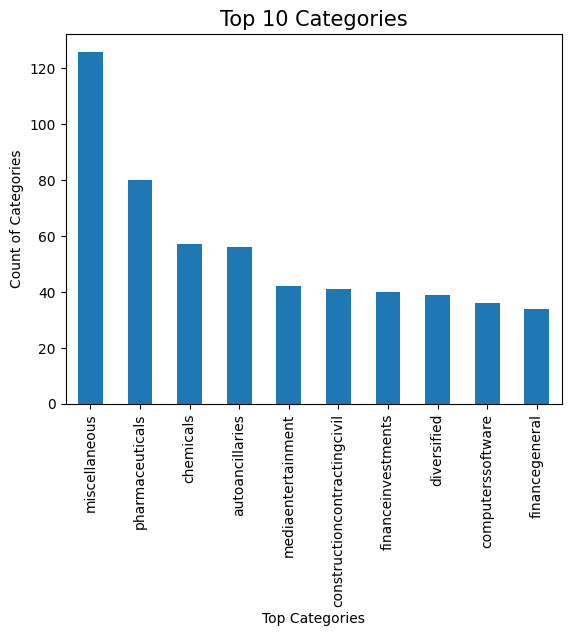

<Figure size 800x600 with 0 Axes>

In [117]:

## top 10 categories
print(f"Top Categories with count:\n{data['catagory'].value_counts().head(10)}")
fig1 = data['catagory'].value_counts().head(10).plot(kind='bar')
plot_labels(fig1,x_label='Top Categories',y_label='Count of Categories',title='Top 10 Categories')
plt.show()

## Numerical Columns

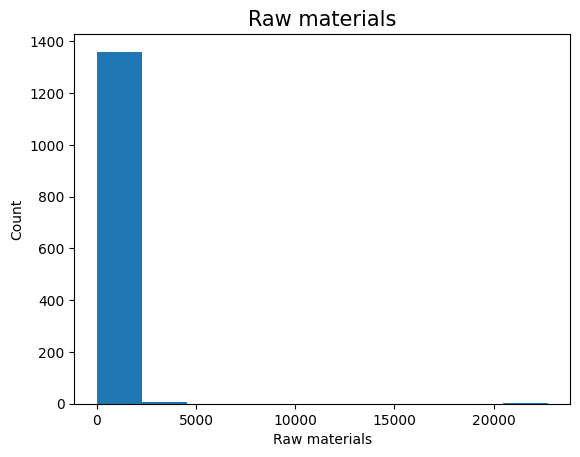

<Figure size 800x600 with 0 Axes>

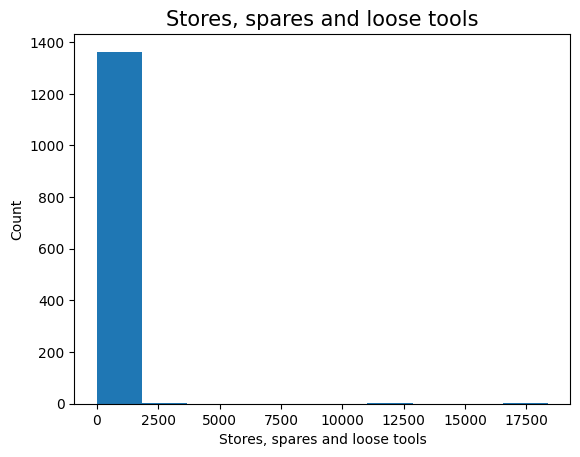

<Figure size 800x600 with 0 Axes>

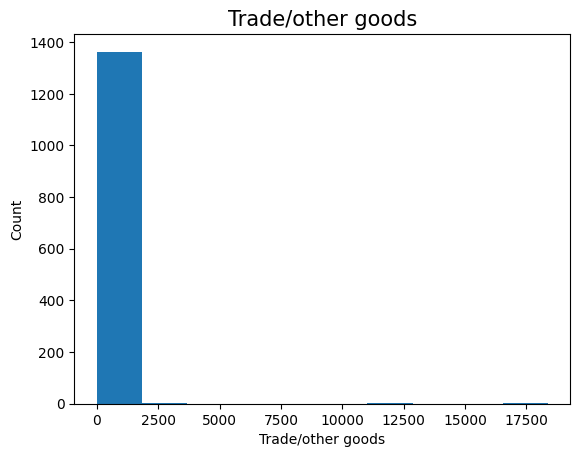

<Figure size 800x600 with 0 Axes>

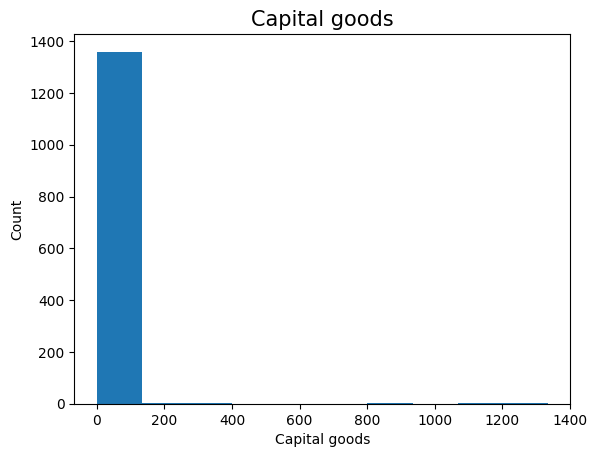

<Figure size 800x600 with 0 Axes>

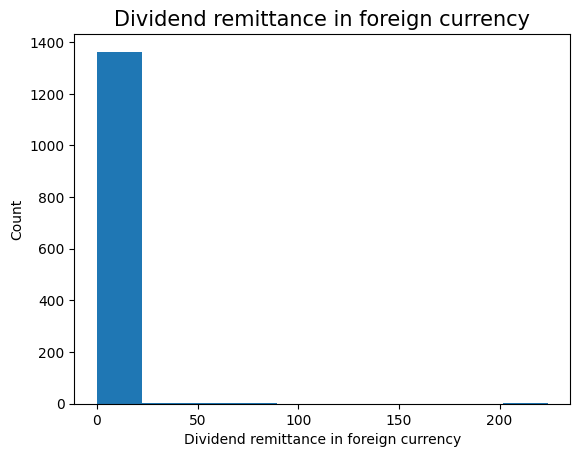

<Figure size 800x600 with 0 Axes>

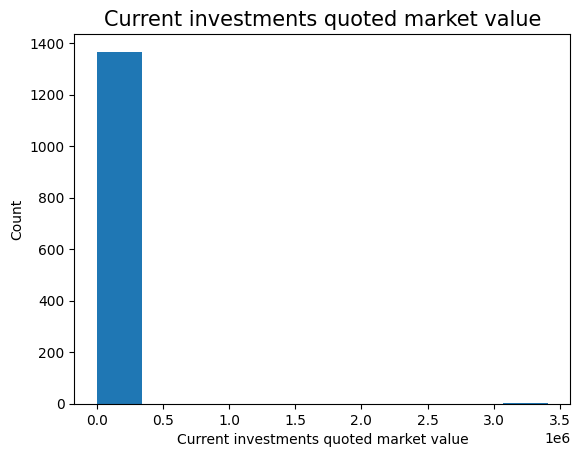

<Figure size 800x600 with 0 Axes>

In [118]:
## lets look at the low variance columns 

for col in low_variance_columns[:6]:
    fig = data[col].plot(kind='hist')
    plot_labels(fig,title=col.capitalize(),x_label=col.capitalize(),y_label='Count')
    
    plt.show()

### Observation
- Plotting the first 10 columns, we can observe that there are very extreme values in the columns and simply looking at the plots we can conclude we if column to included or excluded.
- Moreover, the extereme values could be outlier or natural existing values, though we can standardization and scale the columns to counter these extreme values.

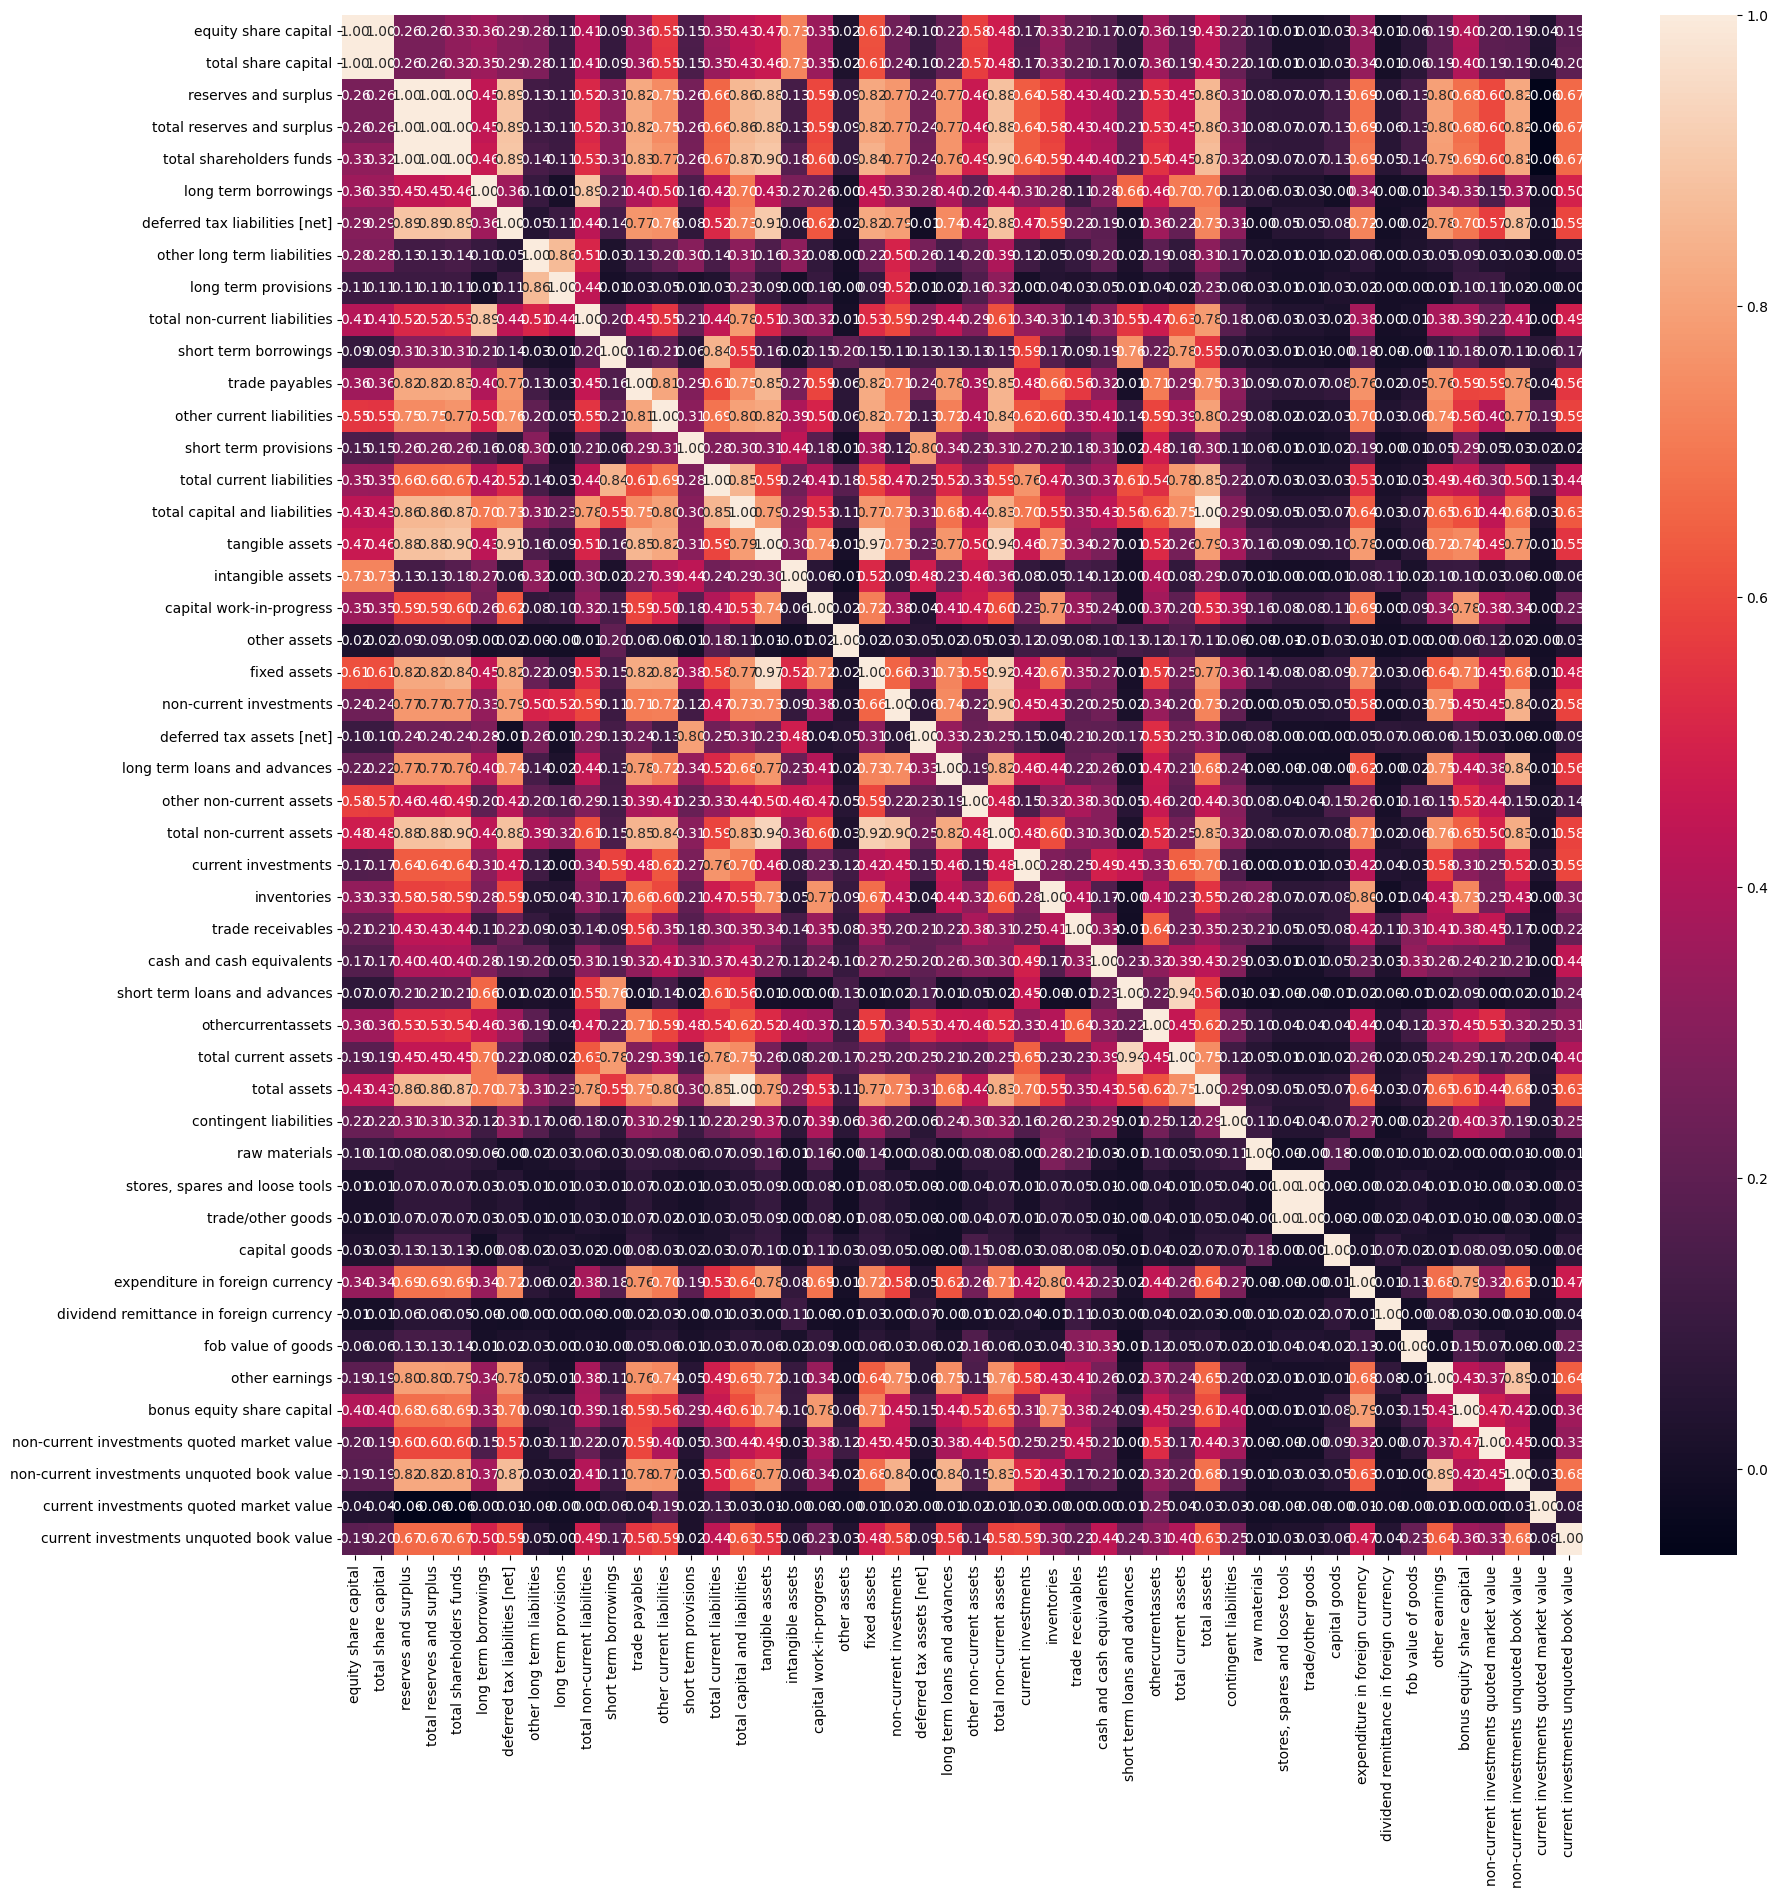

In [119]:
corr = data[numerical_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()


To filter out the columns that are highly correlated in the given correlation matrix, you can set a correlation threshold and exclude the columns that have correlation values above this threshold. By doing so, you'll keep only the columns that have correlations below the threshold, indicating a weaker correlation.

## Preprocessing data
### Data Pipeline

In [120]:
def get_uncorrelated_columns(data_frame, threshold=0.8):
    if not isinstance(data_frame, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame.")
    
    # Calculate the correlation matrix
    corr_matrix = data_frame.corr()
    
    # Find highly positively correlated columns
    highly_pos_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] > threshold]
    
    # Find highly negatively correlated columns
    highly_neg_corr_columns = corr_matrix.columns[corr_matrix.iloc[0] < -threshold]
    
    # Combine both lists to get the final list of columns to exclude
    columns_to_exclude = set(highly_pos_corr_columns).union(set(highly_neg_corr_columns))
    
    # Get the columns that are not highly correlated
    uncorrelated_columns = [col for col in data_frame.columns if col not in columns_to_exclude]
    
    return uncorrelated_columns


unreated_cols = get_uncorrelated_columns(data[numerical_columns],0.8)
unreated_cols

['reserves and surplus',
 'total reserves and surplus',
 'total shareholders funds',
 'long term borrowings',
 'deferred tax liabilities [net]',
 'other long term liabilities',
 'long term provisions',
 'total non-current liabilities',
 'short term borrowings',
 'trade payables',
 'other current liabilities',
 'short term provisions',
 'total current liabilities',
 'total capital and liabilities',
 'tangible assets',
 'intangible assets',
 'capital work-in-progress',
 'other assets',
 'fixed assets',
 'non-current investments',
 'deferred tax assets [net]',
 'long term loans and advances',
 'other non-current assets',
 'total non-current assets',
 'current investments',
 'inventories',
 'trade receivables',
 'cash and cash equivalents',
 'short term loans and advances',
 'othercurrentassets',
 'total current assets',
 'total assets',
 'contingent liabilities',
 'raw materials',
 'stores, spares and loose tools',
 'trade/other goods',
 'capital goods',
 'expenditure in foreign currency'

In [121]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin

class LabelEncoderTransformer(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_encoders = {}

    def fit(self, X, y=None):
        for column in X.columns:
            encoder = LabelEncoder()
            encoder.fit(X[column])
            self.label_encoders[column] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for column, encoder in self.label_encoders.items():
            X_copy[column] = encoder.transform(X[column])
        return X_copy
    
numerical_columns = unreated_cols
    

num_col_pipe = Pipeline([("scaling",StandardScaler())])

preprocess_pipe = ColumnTransformer(
    transformers=[('encoder', LabelEncoderTransformer(), categorical_columns),('scaling',num_col_pipe,numerical_columns)],
)
preprocess_pipe

ColumnTransformer(transformers=[('encoder', LabelEncoderTransformer(),
                                 ['catagory']),
                                ('scaling',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['reserves and surplus',
                                  'total reserves and surplus',
                                  'total shareholders funds',
                                  'long term borrowings',
                                  'deferred tax liabilities [net]',
                                  'other long term liabilities',
                                  'long term provisions',
                                  'total non-current liabilities',
                                  'short t...
                                  'tangible assets', 'intangible assets',
                                  'capital work-in-progress', 'other assets',
                                  'fixed assets', 'non-current investments',
                                  'deferred tax assets [net]',
                                  'long term loans and advances',
                                  'other non-current assets',
                                  'total non-current assets',
                                  'current investments', 'inventories',
                                  'trade receivables',
                                  'cash and cash equivalents',
                                  'short term loans and advances',
                                  'othercurrentassets', ...])])

### Observation
- we defined a `pipeline` for `numerical` columns where `Simple Imputer` is used to impute the missing values with the `median` of the column as seen earlier all columns have extreme values, hence taking the mean won't be ideal as the mean is affected by these extereme values.

- Numerical columns are `standardized` using the `standard scaller`, which scalles the values using `z-score`. 

- For categorical columns, we have defined simple imputer to impute missing values with `most_frequent`(mode) values, though we do not have any missing values for categories, we still want to create a generalised pipeline assuming there might be missing values in unseen data.

- We have used `OrdinalEncoder` to convert categories into numerical form, we have specifically used OridinalEncoder as we have `88` distinct categories in the category columns, hence using `OneHotEncoding` is not ideal as will create 87 new columns. Similarly, since the categories does not have any order, therefore we not used `LabelEncoder` which labels the categories in a order.

In [122]:
X = data[numerical_columns+categorical_columns]
print(f"shape of data before processing:{X.shape}\n")
X_transformed = preprocess_pipe.fit_transform(X)
print(f"shape of data after preprocessing:{X_transformed.shape}")


shape of data before processing:(1368, 47)

shape of data after preprocessing:(1368, 47)


### Transform into different dimentials

In [123]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2,n_jobs=-1)
bs_2d_tr = tnse.fit_transform(X_transformed)

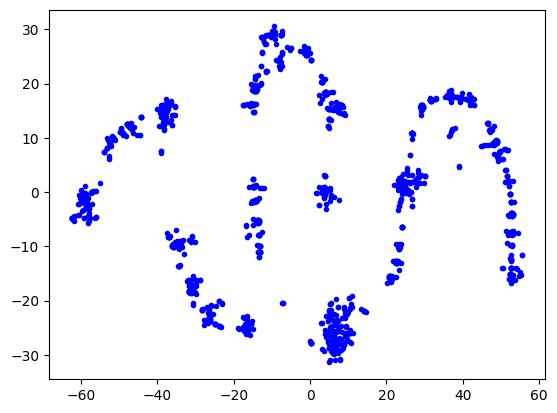

In [124]:
plt.plot(bs_2d_tr[:,0],bs_2d_tr[:,1],"b.")

In [125]:
from sklearn.manifold import TSNE
tnse = TSNE(n_components=2,n_jobs=-1)
bs_2d_tr = tnse.fit_transform(X_transformed)
bs_2d_tr.shape

(1368, 2)

### Apply Kmean clusting 

In [126]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(bs_2d_tr)

KMeans(n_clusters=4)

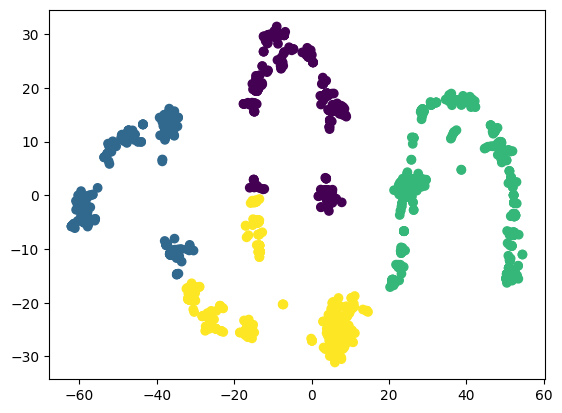

In [127]:
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)

### Apply DB Scan algorithm

In [128]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(n_jobs=-1)
clusters = dbscan.fit_predict(X_transformed)

In [129]:
np.unique(clusters,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54], dtype=int64),
 array([494,  47,   7,   7,   9,  12,   5,  46,   9,  24,   6,  25,  12,
          6,  22,  12,   7,  18,   7,  15,  13,   9,   6,   6,  17,  18,
          5,   8,  15,  23,  29,   7,  17,  10,  18,  10,   7,  28,   6,
        104,   5,  18,  17,   6,   8,  57,  12,  21,  12,   5,   6,   5,
         13,   9,  23,   5], dtype=int64))

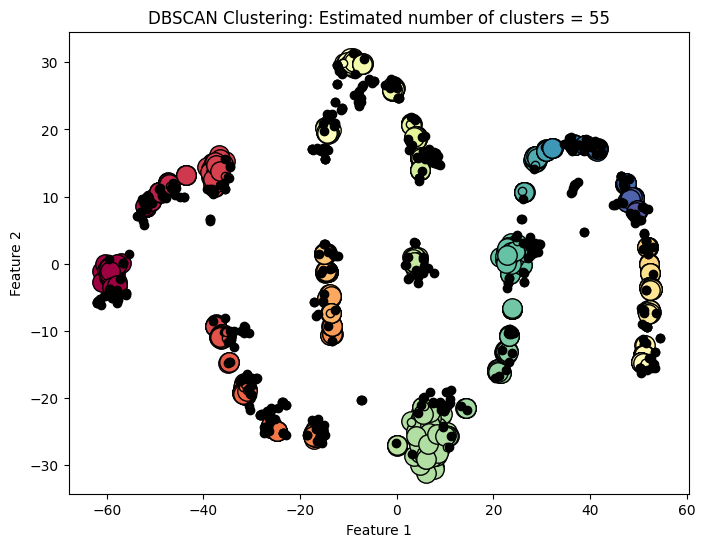

In [130]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the DBSCAN result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = bs_2d_tr[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = bs_2d_tr[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f"DBSCAN Clustering: Estimated number of clusters = {n_clusters_}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [131]:
def plot_dbscan(dbscan,X = X,size=400):
    core_mask = np.zeros_like(dbscan.labels_,dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anormal_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anormal_mask)
    plt.scatter(X[anormal_mask,0],X[anormal_mask,1],marker="x",color='r',s=50,label="anormal")
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask])
    plt.scatter(X[core_mask,0],X[core_mask,1],c=dbscan.labels_[core_mask],s=size,cmap=plt.cm.Paired,zorder=-1,alpha=.4)
    plt.scatter(X[non_core_mask,0],X[non_core_mask,1],marker=".",c=dbscan.labels_[non_core_mask])
    plt.legend()
    plt.title("eps={:.2f} min_sample={}".format(dbscan.eps,dbscan.min_samples))

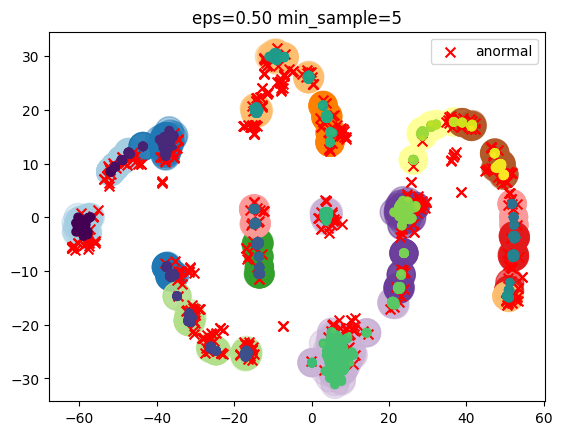

In [132]:
plot_dbscan(dbscan,bs_2d_tr)

### 

In [133]:
from sklearn.cluster import MiniBatchKMeans
import time
ks = range(1,50)
r_inertias = []
m_inertias = []

r_times = []
m_times = []

for k in ks:
    miniKmean = MiniBatchKMeans(n_clusters=k)
    regular_kmean = KMeans(n_clusters=k)
    t1 = time.time()
    regular_kmean.fit(bs_2d_tr)
    t2 = time.time()
    r_times.append(t2-t1)
    r_inertias.append(regular_kmean.inertia_)
    t1 = time.time()
    miniKmean.fit(bs_2d_tr)
    t2 = time.time()
    m_times.append(t2-t1)
    m_inertias.append(miniKmean.inertia_)
    

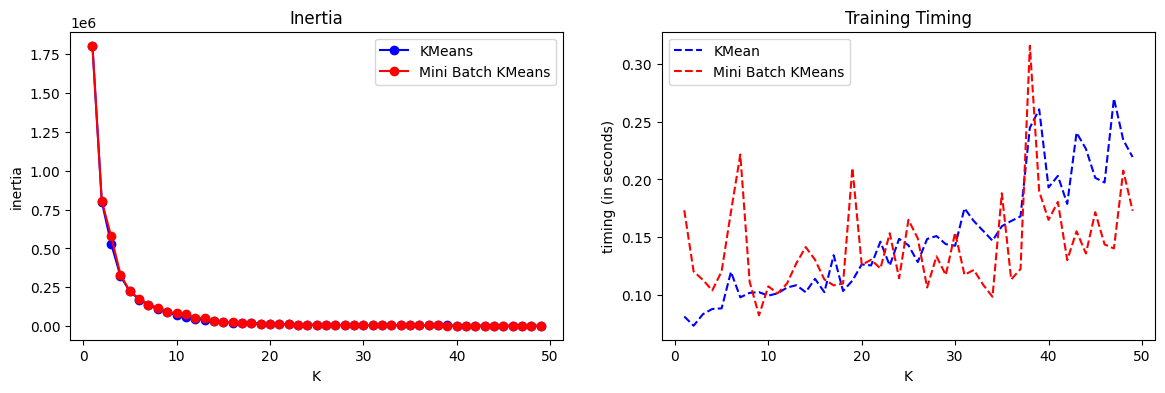

In [134]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(ks,r_inertias,'bo-',label="KMeans")
plt.plot(ks,m_inertias,'ro-',label="Mini Batch KMeans")
plt.title("Inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.legend()
plt.subplot(122)
plt.plot(ks,r_times,"b--",label="KMean")
plt.plot(ks,m_times,"r--",label="Mini Batch KMeans")
plt.title("Training Timing")
plt.xlabel("K")
plt.ylabel("timing (in seconds)")
plt.legend()

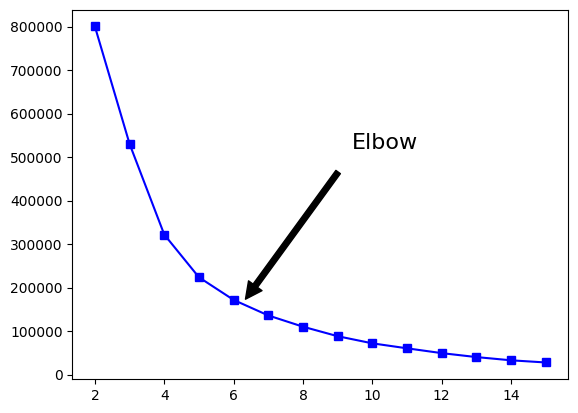

In [135]:
plt.plot(ks[1:15],r_inertias[1:15],"bs-")
plt.annotate("Elbow",xy=[6,r_inertias[6]],xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

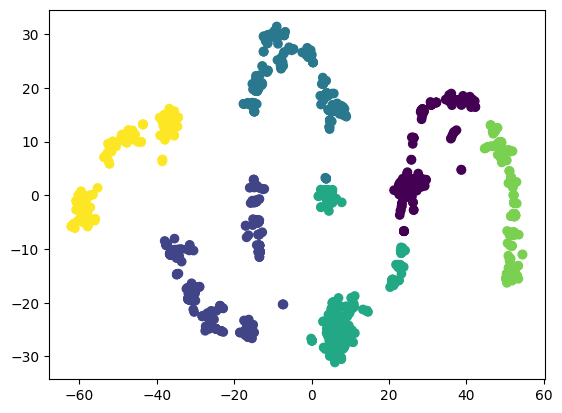

In [136]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(bs_2d_tr)
plt.scatter(bs_2d_tr[:,0],bs_2d_tr[:,1],c=kmeans.labels_)


In [137]:
from sklearn.metrics import silhouette_score
ks = range(2,10)
silhouetes = []
for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(bs_2d_tr)
    silhouetes.append(silhouette_score(bs_2d_tr,km.labels_))

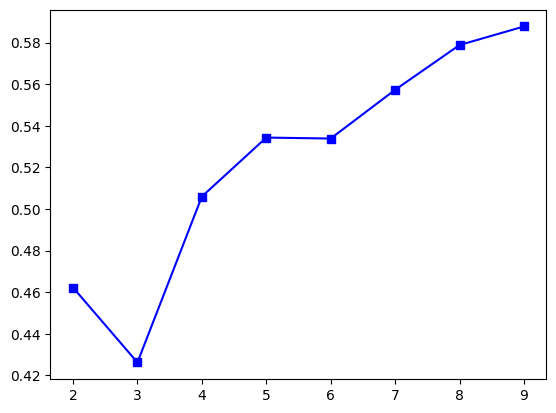

In [138]:
plt.plot(ks,silhouetes,"bs-")

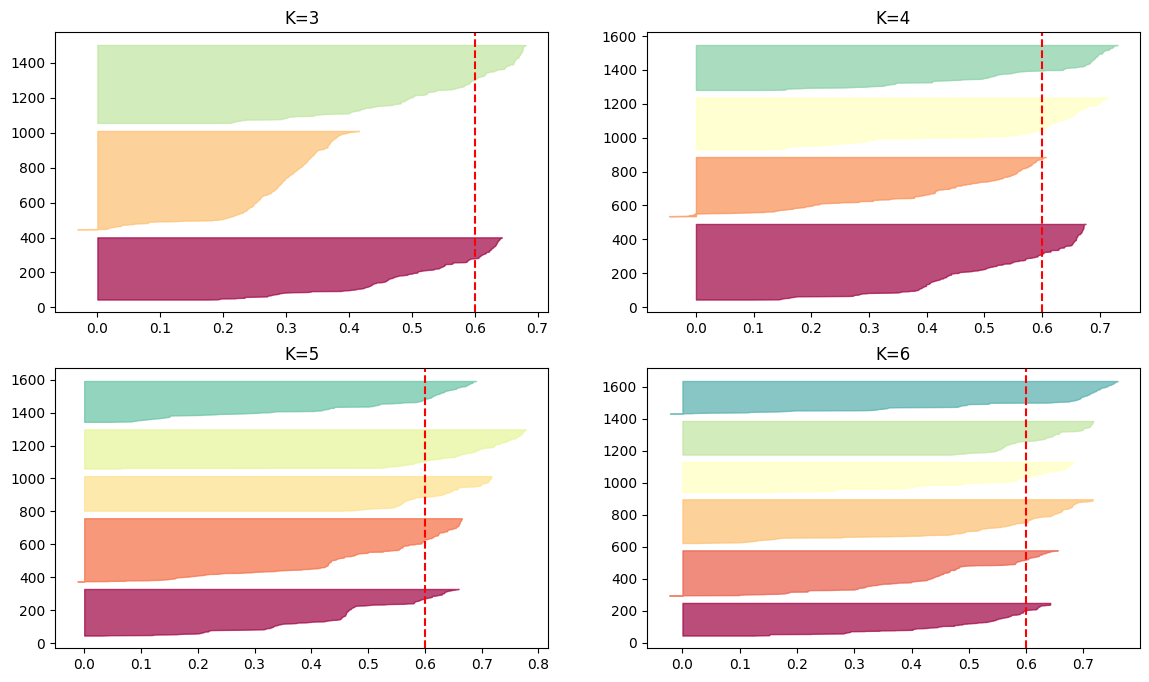

In [139]:
from sklearn.metrics import silhouette_samples
plt.figure(figsize=(14,8))
for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    k3 = KMeans(n_clusters=k)
    ypred = k3.fit_predict(bs_2d_tr)
    padding = len(bs_2d_tr)//30
    pos = padding
    silhouete_coef = silhouette_samples(bs_2d_tr,ypred)
    for i in range(k):
        coef = silhouete_coef[ypred==i]
        coef.sort()
        color = plt.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+len(coef)),0,coef,facecolor=color,edgecolor=color,alpha=.7)
        pos += len(coef) +padding
    plt.axvline(x=0.6,linestyle="--",color="red")
    plt.title("K="+str(k))